In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_excel('Live.xlsx')

In [5]:
df.shape

(7050, 16)

In [6]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [9]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

## Data Preprocessing

In [46]:
#Last 4 columns are redundant, so drop them
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [11]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [12]:
# view the labels in the variable
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [13]:
# view how many different types of variables are there
len(df['status_id'].unique())

6997

In [14]:
df['status_published'].unique()
len(df['status_published'].unique())

6913

In [15]:
df['status_type'].unique()
len(df['status_type'].unique())

4

In [47]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [17]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [48]:
X = df
y = df['status_type']

In [50]:
#Convert categorical variable into integers

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [20]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [56]:
# split data table into data X and class labels y

y = df.iloc[:,1].values
X = df.iloc[:,1:10].values

In [31]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [32]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00014186 0.1508643  0.25075809 0.99506451 0.30504605 0.2677898
  0.17605301 0.07514867 0.1243437 ]
 [0.1508643  1.00014186 0.64072829 0.10170146 0.52129743 0.16241703
  0.32509411 0.23648623 0.22521631]
 [0.25075809 0.64072829 1.00014186 0.1725164  0.82011657 0.40768568
  0.39988229 0.19999833 0.31255689]
 [0.99506451 0.10170146 0.1725164  1.00014186 0.20933778 0.20782924
  0.12080097 0.05217624 0.08744305]
 [0.30504605 0.52129743 0.82011657 0.20933778 1.00014186 0.50887022
  0.50790168 0.20762964 0.3710539 ]
 [0.2677898  0.16241703 0.40768568 0.20782924 0.50887022 1.00014186
  0.28779702 0.08651499 0.18311248]
 [0.17605301 0.32509411 0.39988229 0.12080097 0.50790168 0.28779702
  1.00014186 0.14144092 0.21194022]
 [0.07514867 0.23648623 0.19999833 0.05217624 0.20762964 0.08651499
  0.14144092 1.00014186 0.14209263]
 [0.1243437  0.22521631 0.31255689 0.08744305 0.3710539  0.18311248
  0.21194022 0.14209263 1.00014186]]


In [33]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.09072693e-01 -6.16916146e-01 -7.15773247e-01 -2.09160364e-02
   1.34818007e-02  7.73035618e-02  2.77923792e-02 -6.30296901e-02
  -1.47295615e-02]
 [-3.49468238e-01  2.42348417e-01  1.05766916e-06 -1.66612632e-01
  -6.37574335e-01  2.29248242e-01 -1.28145053e-01 -4.30325616e-01
  -3.61555454e-01]
 [-4.48518215e-01  2.14030388e-01 -1.75971246e-05  6.84176606e-01
   3.97792626e-01 -5.83510285e-02 -2.43519209e-01 -1.73108765e-01
  -1.84425350e-01]
 [-2.66506351e-01 -6.52340400e-01  6.95423698e-01  3.77913246e-02
  -2.00722166e-02  9.98284683e-02  3.55986222e-02 -8.07966205e-02
  -1.48354450e-02]
 [-4.68971693e-01  1.74296364e-01  6.18690863e-02 -6.93885310e-01
   4.82421689e-01 -1.49486661e-01 -8.80820788e-02  1.11783406e-02
  -3.77010014e-02]
 [-3.13631361e-01 -7.42513834e-03  1.34888211e-02  6.39233684e-02
  -4.19209099e-01 -4.40662663e-01 -3.57995790e-01  6.21063950e-01
   1.16236074e-01]
 [-3.20113570e-01  1.50886279e-01  6.11932416e-03  1.18360677e-01
  -9.75337546e

In [34]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.09072693e-01 -6.16916146e-01 -7.15773247e-01 -2.09160364e-02
   1.34818007e-02  7.73035618e-02  2.77923792e-02 -6.30296901e-02
  -1.47295615e-02]
 [-3.49468238e-01  2.42348417e-01  1.05766916e-06 -1.66612632e-01
  -6.37574335e-01  2.29248242e-01 -1.28145053e-01 -4.30325616e-01
  -3.61555454e-01]
 [-4.48518215e-01  2.14030388e-01 -1.75971246e-05  6.84176606e-01
   3.97792626e-01 -5.83510285e-02 -2.43519209e-01 -1.73108765e-01
  -1.84425350e-01]
 [-2.66506351e-01 -6.52340400e-01  6.95423698e-01  3.77913246e-02
  -2.00722166e-02  9.98284683e-02  3.55986222e-02 -8.07966205e-02
  -1.48354450e-02]
 [-4.68971693e-01  1.74296364e-01  6.18690863e-02 -6.93885310e-01
   4.82421689e-01 -1.49486661e-01 -8.80820788e-02  1.11783406e-02
  -3.77010014e-02]
 [-3.13631361e-01 -7.42513834e-03  1.34888211e-02  6.39233684e-02
  -4.19209099e-01 -4.40662663e-01 -3.57995790e-01  6.21063950e-01
   1.16236074e-01]
 [-3.20113570e-01  1.50886279e-01  6.11932416e-03  1.18360677e-01
  -9.75337546e

In [35]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-3.09072693e-01,  6.16916146e-01,  7.73035618e-02,
        -1.47295615e-02,  6.30296901e-02, -2.77923792e-02,
         1.34818007e-02, -2.09160364e-02, -7.15773247e-01],
       [-3.49468238e-01, -2.42348417e-01,  2.29248242e-01,
        -3.61555454e-01,  4.30325616e-01,  1.28145053e-01,
        -6.37574335e-01, -1.66612632e-01,  1.05766916e-06],
       [-4.48518215e-01, -2.14030388e-01, -5.83510285e-02,
        -1.84425350e-01,  1.73108765e-01,  2.43519209e-01,
         3.97792626e-01,  6.84176606e-01, -1.75971246e-05],
       [-2.66506351e-01,  6.52340400e-01,  9.98284683e-02,
        -1.48354450e-02,  8.07966205e-02, -3.55986222e-02,
        -2.00722166e-02,  3.77913246e-02,  6.95423698e-01],
       [-4.68971693e-01, -1.74296364e-01, -1.49486661e-01,
        -3.77010014e-02, -1.11783406e-02,  8.80820788e-02,
         4.82421689e-01, -6.93885310e-01,  6.18690863e-02],
       [-3.13631361e-01,  7.42513834e-03, -4.40662663e-01,
         1.16236074e-01, -6.21063950e-01,  3.579957

In [36]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [37]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.449396736074336
1.7360814097397153
0.9649269307468589
0.834770754325425
0.7926484721624524
0.6925115780331409
0.3804032911388344
0.14926081129742289
1.648182147139733e-08


In [38]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

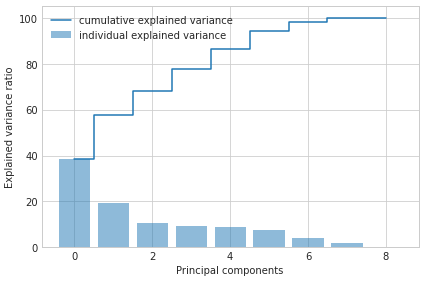

In [39]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(9), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(9), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [57]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [58]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

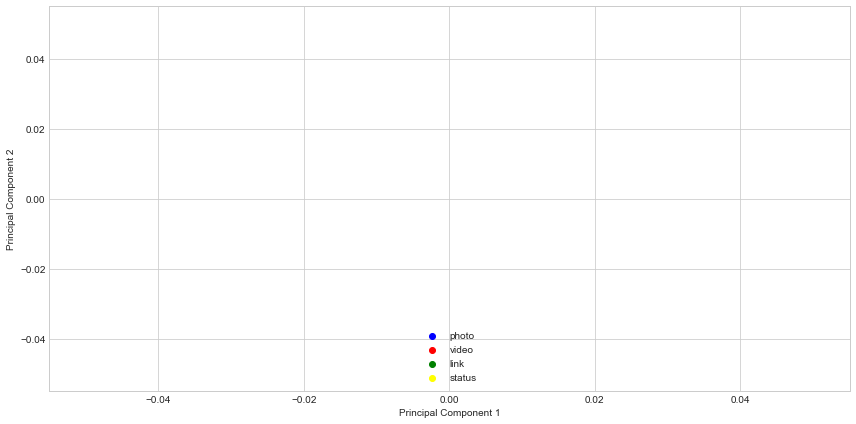

In [59]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    for lab, col in zip(('photo', 'video', 'link', 'status'),
                        ('blue', 'red', 'green', 'yellow')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [61]:
Y_sklearn

array([[ 2.25581666, -0.12210871],
       [-0.63292114,  0.04736599],
       [ 0.10080407, -0.05742662],
       ...,
       [-0.80842464, -0.37063443],
       [-0.27745902,  0.55648613],
       [-0.80064815, -0.32304647]])

### Feature Scaling

In [21]:
cols = X.columns

In [22]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [23]:
X = pd.DataFrame(X, columns=[cols])

In [24]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


### K-Means model with 2 clusters

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(Y_sklearn)

KMeans(n_clusters=4, random_state=0)

In [27]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [67]:
kmeans.inertia_

7154.26655195778

In [69]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 121 out of 7050 samples were correctly labeled.


In [70]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.02


In [ ]:
#Use elbow method to find optimal number of clusters

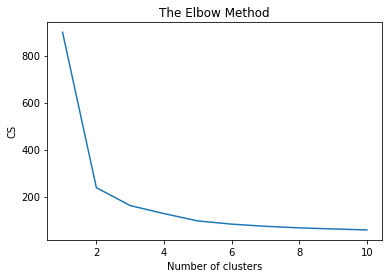

In [31]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### K-Means model with 3 clusters

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


### K-Means model with 4 clusters

In [34]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 211 out of 7050 samples were correctly labeled.
Accuracy score: 0.03
